<a href="https://colab.research.google.com/github/MansourMhz/MansourMhz/blob/main/6091400.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import torch

In [38]:
dataset = pd.read_csv('/content/drive/MyDrive/MasterThesis/xauusd.csv')

In [39]:
type(dataset)

pandas.core.frame.DataFrame

In [40]:
dataset.head(5)

,Date,Open,High,Low,Close
0,2016-03-01,1240.49,1248.77,1227.48,1232.66
1,2016-03-02,1231.44,1244.23,1225.02,1239.83
2,2016-03-03,1239.49,1268.55,1237.72,1264.87
3,2016-03-04,1260.20,1279.97,1250.78,1261.55
4,2016-03-07,1264.23,1273.43,1257.12,1267.54


In [43]:
dataset.shape

(1451, 5)

In [42]:
dataset.shape[0]

1451

In [44]:
dataset.shape[1]

5

In [45]:
dataset.shape[0]*0.70

1015.6999999999999

In [46]:
num_train = int(dataset.shape[0]*0.70)

In [47]:
num_train

1015

In [48]:
type(dataset)

pandas.core.frame.DataFrame

In [49]:
training_set = dataset.iloc[0:num_train,1].values

In [50]:
training_set

array([1240.49, 1231.44, 1239.49, ..., 1593.43, 1577.24, 1552.94])

In [51]:
training_set.shape

(1015,)

In [52]:
testing_set = dataset.iloc[num_train:,1].values

In [53]:
testing_set

array([1556.23 , 1566.85 , 1572.05 , 1572.19 , 1568.07 , 1566.04 ,
       1576.17 , 1582.4  , 1584.33 , 1601.68 , 1612.29 , 1620.57 ,
       1654.84 , 1659.35 , 1634.97 , 1640.81 , 1644.275, 1592.13 ,
       1587.07 , 1640.18 , 1639.46 , 1672.58 , 1698.35 , 1671.53 ,
       1653.22 , 1638.94 , 1577.09 , 1546.77 , 1508.19 , 1532.86 ,
       1485.   , 1467.94 , 1489.05 , 1564.79 , 1632.12 , 1611.37 ,
       1629.26 , 1620.75 , 1623.38 , 1576.59 , 1590.73 , 1615.89 ,
       1617.65 , 1663.92 , 1648.92 , 1645.8  , 1685.3  , 1711.84 ,
       1727.59 , 1717.84 , 1717.64 , 1682.59 , 1696.475, 1688.49 ,
       1713.94 , 1730.53 , 1728.52 , 1713.255, 1708.59 , 1714.05 ,
       1686.93 , 1701.92 , 1701.07 , 1706.04 , 1683.73 , 1717.12 ,
       1702.03 , 1697.26 , 1702.26 , 1716.515, 1730.43 , 1746.2  ,
       1732.54 , 1745.91 , 1747.92 , 1727.32 , 1733.7  , 1728.84 ,
       1710.75 , 1711.29 , 1719.05 , 1736.49 , 1738.97 , 1727.8  ,
       1700.42 , 1715.26 , 1684.24 , 1698.16 , 1713.9  , 1737.

In [54]:
testing_set.shape

(436,)

In [55]:
from sklearn.preprocessing import MinMaxScaler

In [56]:
type(training_set)

numpy.ndarray

In [57]:
sc = MinMaxScaler(feature_range=(0,1))

In [58]:
training_set[0:5]

array([1240.49, 1231.44, 1239.49, 1260.2 , 1264.23])

In [59]:
training_set.reshape(-1,1)

array([[1240.49],
       [1231.44],
       [1239.49],
       ...,
       [1593.43],
       [1577.24],
       [1552.94]])

In [60]:
training_set_scaled = sc.fit_transform(training_set.reshape(-1,1))

In [61]:
testing_set_scaled = sc.fit_transform(testing_set.reshape(-1,1))

In [62]:
type(training_set_scaled)

numpy.ndarray

In [63]:
timestep = 60
X_train =[]
Y_train =[]

In [64]:
len(training_set)

1015

In [65]:
training_set_scaled.shape

(1015, 1)

In [66]:
for i in range(timestep,len(training_set)):
    X_train.append(training_set_scaled[i-timestep:i,0]) #
    Y_train.append(training_set_scaled[i,0])

In [67]:
training_set_scaled[60-60:60,0] #X_train =0-59  ---Y_train=60

array([0.24030307, 0.22082311, 0.23815059, 0.28272849, 0.29140299,
       0.30248827, 0.28623703, 0.26695079, 0.30608291, 0.26337767,
       0.22964828, 0.22396573, 0.28283611, 0.2807482 , 0.27291317,
       0.24798743, 0.25616686, 0.20237634, 0.18842826, 0.19970726,
       0.24506005, 0.20870464, 0.22370743, 0.19736106, 0.18685695,
       0.22116751, 0.20343106, 0.239808  , 0.23978647, 0.27876792,
       0.27254725, 0.24417754, 0.21270825, 0.22872272, 0.22351371,
       0.26249516, 0.24574885, 0.25474622, 0.22478368, 0.23576133,
       0.24772913, 0.25179732, 0.2964398 , 0.3496922 , 0.35098368,
       0.33839167, 0.32536915, 0.32244178, 0.33645443, 0.29179043,
       0.29588015, 0.32069827, 0.29054199, 0.30784795, 0.31152869,
       0.32429291, 0.27932756, 0.2721598 , 0.26307633, 0.25907271])

In [68]:
training_set_scaled[61-60:61,0].shape #1-61 ---61

(60,)

In [69]:
training_set_scaled[62-60:62,0].shape #2-62 ---62

(60,)

In [70]:
training_set_scaled[63-60:63,0].shape #3-63 ---63

(60,)

In [71]:
type(X_train)

list

In [72]:
x_train = np.array(X_train)

In [73]:
x_train = np.array(X_train)
y_train = np.array(Y_train)

In [74]:
y_train.shape

x_train.shape

(955, 60)

In [75]:
X_train = np.reshape(x_train,(x_train.shape[0], x_train.shape[1],1))

In [76]:
X_train.shape

(955, 60, 1)

In [77]:
Y_train = np.reshape(y_train,(y_train.shape[0],1))

In [78]:
Y_train.shape

(955, 1)

In [82]:
X_test = []
Y_test =[]

In [83]:
for i in range(timestep,len(testing_set)):
    X_test.append(testing_set_scaled[i-timestep:i,0])
    Y_test.append(testing_set_scaled[i,0])


In [85]:
x_test = np.array(X_test)
y_test = np.array(Y_test)

In [86]:
X_test = np.reshape(x_test,(x_test.shape[0], x_test.shape[1],1))

In [87]:
Y_test = np.reshape(y_test,(y_test.shape[0],1))

In [88]:
#modeling
X_train
Y_train
#testing
X_test
Y_test

array([[0.36633879],
       [0.3914149 ],
       [0.38999297],
       [0.39830707],
       [0.36098565],
       [0.41684232],
       [0.39159892],
       [0.38361939],
       [0.39198367],
       [0.41583024],
       [0.43910803],
       [0.46548898],
       [0.44263776],
       [0.46500385],
       [0.46836629],
       [0.43390545],
       [0.44457827],
       [0.43644819],
       [0.40618622],
       [0.40708956],
       [0.42007093],
       [0.44924554],
       [0.45339423],
       [0.43470842],
       [0.38890562],
       [0.4137308 ],
       [0.3618388 ],
       [0.38512496],
       [0.41145572],
       [0.45167118],
       [0.43470006],
       [0.44407642],
       [0.43027535],
       [0.43213222],
       [0.43224932],
       [0.42534043],
       [0.47189602],
       [0.47995918],
       [0.50217471],
       [0.49088293],
       [0.49747399],
       [0.51480478],
       [0.51007059],
       [0.5265315 ],
       [0.50448325],
       [0.51552411],
       [0.51610124],
       [0.530

In [89]:
x_train = torch.from_numpy(X_train).type(torch.Tensor)

x_train.shape

torch.Size([955, 60, 1])

In [90]:
type(x_train)

torch.Tensor

In [91]:
y_train = torch.from_numpy(Y_train).type(torch.Tensor)

In [92]:
x_test = torch.from_numpy(X_test).type(torch.Tensor)

In [93]:
y_test = torch.from_numpy(Y_test).type(torch.Tensor)

In [94]:
x_train
y_train
x_test
y_test

tensor([[0.3663],
        [0.3914],
        [0.3900],
        [0.3983],
        [0.3610],
        [0.4168],
        [0.3916],
        [0.3836],
        [0.3920],
        [0.4158],
        [0.4391],
        [0.4655],
        [0.4426],
        [0.4650],
        [0.4684],
        [0.4339],
        [0.4446],
        [0.4364],
        [0.4062],
        [0.4071],
        [0.4201],
        [0.4492],
        [0.4534],
        [0.4347],
        [0.3889],
        [0.4137],
        [0.3618],
        [0.3851],
        [0.4115],
        [0.4517],
        [0.4347],
        [0.4441],
        [0.4303],
        [0.4321],
        [0.4322],
        [0.4253],
        [0.4719],
        [0.4800],
        [0.5022],
        [0.4909],
        [0.4975],
        [0.5148],
        [0.5101],
        [0.5265],
        [0.5045],
        [0.5155],
        [0.5161],
        [0.5301],
        [0.5481],
        [0.5716],
        [0.5595],
        [0.5538],
        [0.5607],
        [0.5701],
        [0.5729],
        [0

In [95]:
x_train[5].shape

input_dim = 1 #  60 lstm  1 day
hidden_dim = 32
num_layers = 2
output_dim = 1 # 60 lstm 1 day

In [96]:
class MyLSTM(torch.nn.Module):

    def __init__(self, input_dim, hidden_dim, num_layers,output_dim):
        super(MyLSTM,self).__init__()

        self.hidden_dim = hidden_dim
        self.num_layers = num_layers

        self.lstm = torch.nn.LSTM(input_dim, hidden_dim,num_layers, batch_first = True) #1 -- 32

        self.fc = torch.nn.Linear(hidden_dim, output_dim) #32 --- 1
        self.sf = torch.nn.Sigmoid() #0,1

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).requires_grad_()   
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).requires_grad_()
        out, (hn, cn) = self.lstm (x, (h0.detach(),c0.detach()))
        out = self.fc(out[:,-1,:]) # black hidd feature
        out = self.sf(out)

        return out

In [97]:
model = MyLSTM(input_dim=input_dim, hidden_dim=hidden_dim, output_dim=output_dim, num_layers=num_layers)

In [98]:
model

MyLSTM(
  (lstm): LSTM(1, 32, num_layers=2, batch_first=True)
  (fc): Linear(in_features=32, out_features=1, bias=True)
  (sf): Sigmoid()
)

In [100]:
#loss_fn = torch.nn.MSELoss() #l2score l1score #smooth MSE #huber

loss_fn = torch.nn.L1Loss() # best 1

# loss_fn = torch.nn.SmoothL1Loss()

# loss_fn = torch.nn.HuberLoss() # best 2

optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

# optimizer = torch.optim.Adagrad(model.parameters(), lr=0.01)

# optimizer = torch.optim.RMSprop(model.parameters(), lr=0.01)

#train model

In [101]:
num_epoch = 100
listLoss = np.zeros(num_epoch)

In [102]:
for t in range(num_epoch):

    y_train_pred = model(x_train) # forward(self,x) inputs
    loss = loss_fn(y_train_pred , y_train) #loss
    listLoss[t] = loss.item() #save loss in list
    print("epoch:",t,  "loss", loss.item()) #print lossepoch
    optimizer.zero_grad() #
    loss.backward() #
    optimizer.step() # update


epoch: 0 loss 0.2142752856016159
epoch: 1 loss 0.18989789485931396
epoch: 2 loss 0.1641932725906372
epoch: 3 loss 0.15080110728740692
epoch: 4 loss 0.1626386195421219
epoch: 5 loss 0.15210124850273132
epoch: 6 loss 0.1468985676765442
epoch: 7 loss 0.14880767464637756
epoch: 8 loss 0.14977283775806427
epoch: 9 loss 0.1488407850265503
epoch: 10 loss 0.14630676805973053
epoch: 11 loss 0.14275367558002472
epoch: 12 loss 0.1393394023180008
epoch: 13 loss 0.1375652551651001
epoch: 14 loss 0.1341451108455658
epoch: 15 loss 0.12470818310976028
epoch: 16 loss 0.11086767911911011
epoch: 17 loss 0.1104072853922844
epoch: 18 loss 0.080800861120224
epoch: 19 loss 0.1005273386836052
epoch: 20 loss 0.07577980309724808
epoch: 21 loss 0.10262500494718552
epoch: 22 loss 0.06253624707460403
epoch: 23 loss 0.07217670977115631
epoch: 24 loss 0.0734931230545044
epoch: 25 loss 0.059503551572561264
epoch: 26 loss 0.05374950170516968
epoch: 27 loss 0.06378913670778275
epoch: 28 loss 0.054609205573797226
epoch:

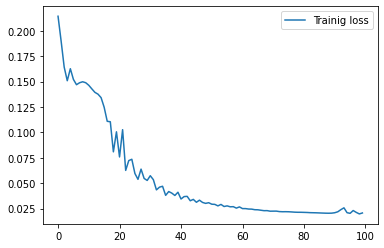

In [103]:
plt.plot(listLoss, label ="Trainig loss")
plt.legend()
plt.show()

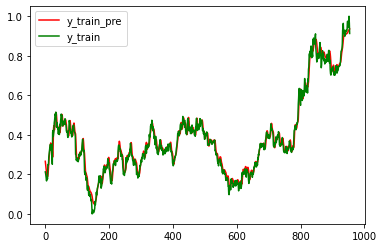

In [104]:
plt.plot(y_train_pred.detach().numpy(), label ="y_train_pre", color ='red')
plt.plot(y_train.detach().numpy(), label ="y_train", color ='green')
plt.legend()
plt.show()

In [105]:
from sklearn.metrics import r2_score

In [106]:
r2_score = r2_score(y_train.detach().numpy(), y_train_pred.detach().numpy())

In [107]:
r2_score

0.9823046543831799

In [108]:
y_test_pred = model(x_test)

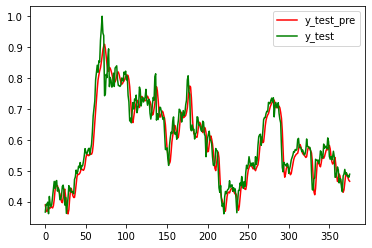

In [109]:
plt.plot(y_test_pred.detach().numpy(), label ="y_test_pre", color ='red')
plt.plot(y_test.detach().numpy(), label ="y_test", color ='green')
plt.legend()
plt.show()

In [110]:
a = y_test_pred.detach().numpy()
b = y_test.detach().numpy()

In [111]:
q1 = a[0:50]
q2 = a[50:100]
q3 = a[100:150]
q4 = a[150:200]
q5 = a[200:250]
q6 = a[250:300]
q7 = a[300:]

In [112]:
w1 = b[0:50]
w2 = b[50:100]
w3 = b[100:150]
w4 = b[150:200]
w5 = b[200:250]
w6 = b[250:300]
w7 = b[300:]

In [113]:
len(q1)

50

In [115]:
trend = ""
if (q1[0]<q1[len(q1)-1]):
    trend = "positive trend"
else:
  trend = "negative trend"

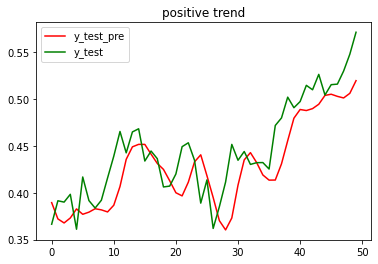

In [116]:
plt.plot(q1, label ="y_test_pre", color ='red')
plt.plot(w1, label ="y_test", color ='green')
plt.title(trend)
plt.legend()
plt.show()

In [118]:
trend = ""
if (q2[0]<q2[len(q2)-1]):
    trend = "positive trend"

else:
    trend = "negative trend"

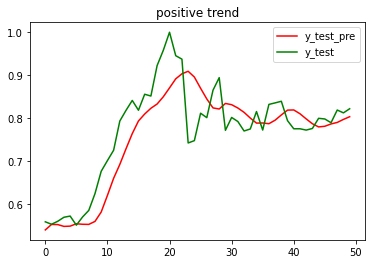

In [119]:
plt.plot(q2, label ="y_test_pre", color ='red')
plt.plot(w2, label ="y_test", color ='green')
plt.title(trend)
plt.legend()
plt.show()

In [120]:
if (q3[0]<q3[len(q3)-1]):
    trend = "positive trend"

else:
    trend = "negative trend"

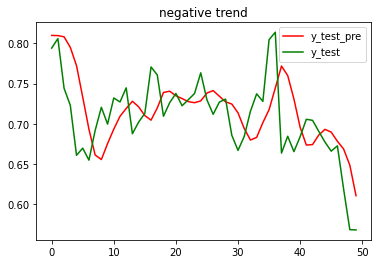

In [121]:
plt.plot(q3, label ="y_test_pre", color ='red')
plt.plot(w3, label ="y_test", color ='green')
plt.title(trend)
plt.legend()
plt.show()

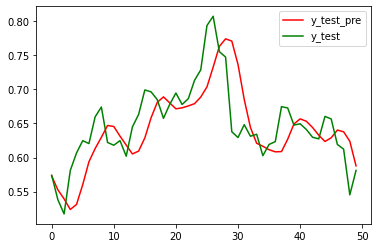

In [122]:
plt.plot(q4, label ="y_test_pre", color ='red')
plt.plot(w4, label ="y_test", color ='green')
plt.legend()
plt.show()

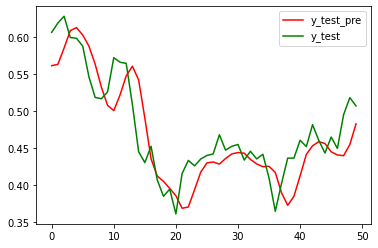

In [123]:
plt.plot(q5, label ="y_test_pre", color ='red')
plt.plot(w5, label ="y_test", color ='green')
plt.legend()
plt.show()


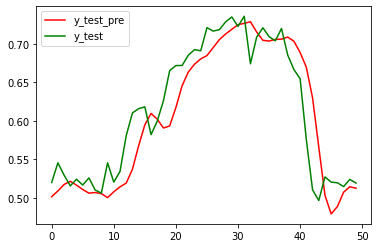

In [124]:
plt.plot(q6, label ="y_test_pre", color ='red')
plt.plot(w6, label ="y_test", color ='green')
plt.legend()
plt.show()

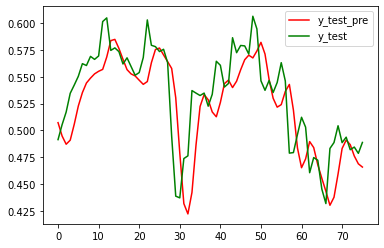

In [125]:
plt.plot(q7, label ="y_test_pre", color ='red')
plt.plot(w7, label ="y_test", color ='green')
plt.legend()
plt.show()

In [126]:
y_test.shape

torch.Size([376, 1])

In [127]:
y_test_pred.shape

torch.Size([376, 1])

In [128]:
y_test_pred = y_test_pred.detach().numpy()
y_test = y_test.detach().numpy()

In [129]:
import sklearn
r2_score = sklearn.metrics.r2_score(y_test, y_test_pred)
r2_score

0.8976718191883805

In [130]:
from sklearn.metrics import mean_absolute_error, mean_squared_error # Error

In [131]:
mean_absolute_error = mean_absolute_error(y_train.detach().numpy(), y_train_pred.detach().numpy())

In [132]:
mean_absolute_error

0.02063224

In [133]:
mean_squared_error = mean_squared_error(y_train.detach().numpy(), y_train_pred.detach().numpy())

In [134]:
mean_squared_error

0.0007412495

In [135]:
Root_mean_squared_error = np.sqrt(sklearn.metrics.mean_squared_error(y_train.detach().numpy(), y_train_pred.detach().numpy()))

In [136]:
Root_mean_squared_error

0.027225897